In [ ]:
import random
import math
import duckdb
import importlib
import optimized_fractals as of
importlib.reload(of) # Reload modules actively being developed
import matplotlib.pyplot as plt

In [ ]:
# Implementation of PSO for fractals

class particle:

    def __init__(self, parameters, resolution):
        self.parameters = parameters
        self.best_parameters = parameters.copy()
        self.velocity = [0.0] * len(parameters)
        self.fitness = of.surface_area(resolution, resolution, 4.0 / resolution, 0.0, 0.0, parameters)
        self.best_fitness = self.fitness

    def __str__(self):
        return "Parameters:\n" + "\n".join(["           " + str(parameter) for parameter in self.parameters]) + "\n\nVelocity:\n" + "\n".join(["         " + str(velocity) for velocity in self.velocity])


    def step(self, resolution):

        for i in range(len(self.parameters)):
            self.parameters[i] += self.velocity[i]

        # Recalculate fitness and update best variables if necessary
        self.fitness = of.surface_area(resolution, resolution, 4.0 / resolution, 0.0, 0.0, self.parameters)
        if self.fitness > self.best_fitness:
            self.best_fitness = self.fitness
            self.best_parameters = self.parameters.copy()

    def update_velocity(self, w, c1, c2, best_parameters):

        for i in range(len(self.velocity)):
            r1 = random.uniform(0.0, 1.0)
            r2 = random.uniform(0.0, 1.0)
            self.velocity[i] = w * self.velocity[i] + r1*c1*(self.best_parameters[i] - self.parameters[i]) + r2*c2*(best_parameters[i] - self.parameters[i])


class swarm:

    def __init__(self, particles, w, c1, c2, limited=False, mask = []):

        self.particles = particles

        self.best_parameters = []
        self.best_fitness = 0

        self.w = w
        self.c1 = c1
        self.c2 = c2

        self.update_best()

        # Initialize particle velocities

        if (not limited):
            for particle in self.particles:
                particle.velocity = [random.uniform(-0.01,0.01) for i in range(len(particle.velocity))]
        else:
            for particle in self.particles:
                particle.velocity = [random.uniform(-0.01,0.01) if mask[i] else 0.0 for i in range(len(particle.velocity))]

    def update_best(self):
        # Find best parameters and position across all particles
        for particle in self.particles:
            if particle.best_fitness > self.best_fitness:
                self.best_fitness = particle.best_fitness
                self.best_parameters = particle.best_parameters.copy()


    def step(self, resolution):

        for particle in self.particles:

            particle.step(resolution)

            particle.update_velocity(self.w, self.c1, self.c2, self.best_parameters)

            # Check if updated particle has better fitness
            if particle.fitness > self.best_fitness:
                self.best_fitness = particle.fitness
                self.best_parameters = particle.best_parameters
    

In [1]:
# Gets starting parameters but sets masked ones to 0
def get_limited_rand_starting_parameters(N, mask):
    out = []

    for n in range(N):
        parameters = []

        for i in range(52):
            if (mask[i]):
                parameters.append(random.uniform(-2.0, 2.0))
            else:
                parameters.append(0.0)

        out.append(parameters.copy())

    return out



# Tests PSO multiple times with a certain mask, then gives graph of results and best fitness/parameters out of the bunch 
# Uses resolution of 2048x2048
def mask_report(mask, runs, iter_per_run):

    plt.title("Training Progress")

    very_best_parameters = []
    very_best_fitness = 0

    for i in range(runs):
        # Initialize parameters and swarm
        parameters = get_limited_rand_starting_parameters(30, mask)
        report_swarm =  swarm([particle(list(parameter),2048) for parameter in parameters], 0.8, 2.0, 0.8, limited=True, mask=mask)

        fitness_history = []

        for _ in range(iter_per_run): # step iter_per_run * 10 times
            
            # Record every tenth fitness
            fitness_history.append(report_swarm.best_fitness)

            for _ in range(10):
                report_swarm.step(2048)

        plt.plot(fitness_history) # Graph each run

        if report_swarm.best_fitness > very_best_fitness: # Update best values
            very_best_fitness = report_swarm.best_fitness
            very_best_parameters = report_swarm.best_parameters

    # Report findings
    print("Best fitness: " + str(very_best_fitness))

    plt.show()

    print("Best Parameters:")
    print(very_best_parameters)




Results of running mask_report for various masks

Best fitness: 119744


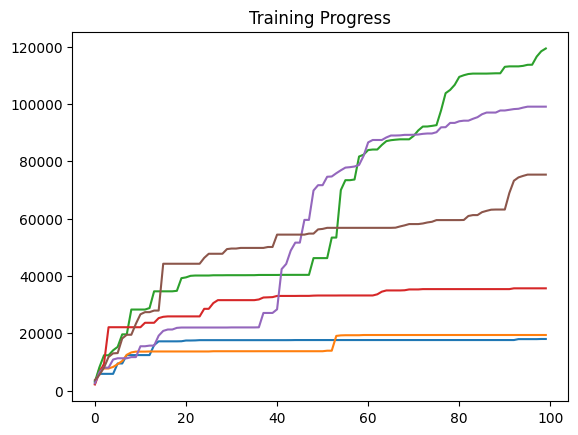

Best Parameters:
[0.03756701676145228, 0.2642949956407883, 0.2703398168706797, 0.14812456058198037, 0.8438873869167732, -0.14249415496448065, -0.48291861465923536, 1.159403693625582, 1.5021509907151767, 1.3714559360044862, -0.39643778342008545, 1.8301471832842338, 0.4552868124658877, -1.9265712261182317, 0.901812907517516, -0.10615071286104036, 1.0447986204092574, 0.0211970333631866, 0.3842795912405312, -0.165404595384893, -0.6424091096361445, -0.3880890762931235, 1.0061775816462781, -2.042573174774556, -0.05242758237795444, 0.5623616008679319, -1.1506903522141139, 1.5397102426783427, -12.036577659407158, -0.3656422747311888, -0.1746482307767243, 1.1208367929187364, -2.449099229544176, 0.475371356421023, -0.513262845945821, -0.5128868815946237, -0.03724331762235962, 0.0603254465269843, 0.28220714256166013, -0.9557819710459736, 1.392265590271449, 0.9430906275358896, -1.1092192491839818, -0.5046837791329054, 0.025339181017793894, 0.7211488995387578, -3.3607141232786106, -0.08823033363074

In [56]:
# Run PSO on all parameters
mask_report([True]*52, 6, 100)

Best fitness: 1159240


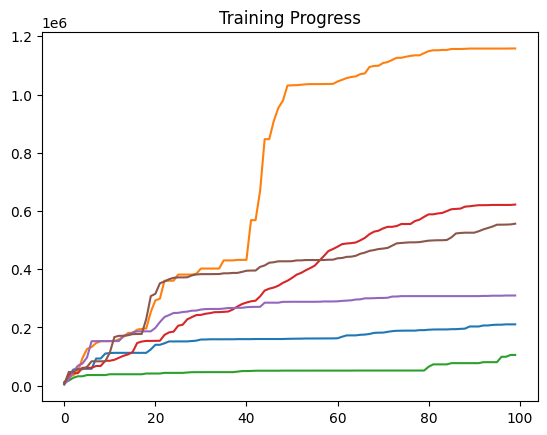

Best Parameters:
[0.015403621568165323, 0.0, 0.00862593432834908, 0.0, 1.054345440130578, 0.0, 0.36400219281315926, 0.0, 0.5099412357000553, 0.0, -0.6282023027814596, 0.0, 0.4625036901477281, 0.0, 0.19868255284947037, 0.0, 0.801343132851632, 0.0, -0.36858518285432973, 0.0, -0.5892356509145206, 0.0, -0.1769306050102589, 0.0, 0.1011507097488861, 0.0, 0.008076563346255033, 0.0, -5.228010411186473, 0.0, -0.31219163909550945, 0.0, -1.4899584557317953, 0.0, -1.6449051978089861, 0.0, -0.6291456150989613, 0.0, -0.2718989514680718, 0.0, -1.6254306833182766, 0.0, -0.07595308077111079, 0.0, 2.089037855992636, 0.0, 0.9575338047863039, 0.0, -0.47543894453070656, 0.0, 0.982541140502665, 0.0]


In [65]:
# Do PSO on only real coefficients, this gaurantees symmetry and will hopefully make better looking pictures.
real_mask = [True if (i%2==0) else False for i in range(52)]
mask_report(real_mask, 6, 100)

Best fitness: 729609


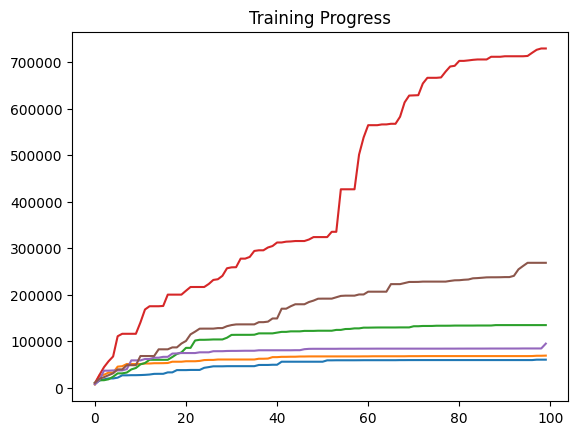

Best Parameters:
[-0.04313365001960745, -0.03520461455692619, -0.005876809128988258, -0.008186070208366028, -0.984100315290525, -0.20421020656543312, 0.001102926393161167, -0.013302259172825093, 0.002706628904363072, -0.02179634445092738, -0.07803359462617789, -0.18098969773472057, -0.13193465212177607, -0.24050142262676605, 0.023864024939317455, 0.11688873252490703, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [66]:
# I believe that the Z conjugate is what is allowing the fractals I generate to have holes (becuase its not analytic)
# If we only optimize the first 16 parameters there wont be any holes in the result, hopefully making something more interesting
first_16_mask = [True if (i<16) else False for i in range(52)]
mask_report(first_16_mask, 6, 100)

Best fitness: 444612


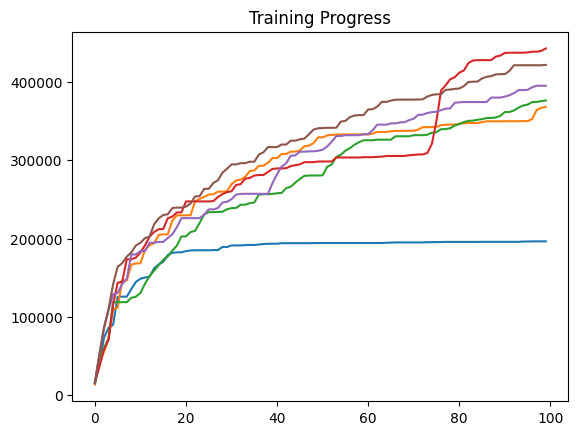

Best Parameters:
[3.6966137762061286e-24, 0.0, -1.3343000261465381e-24, 0.0, -1.1205433189366325, 0.0, 0.002577162659551787, 0.0, -0.029448901574241963, 0.0, -0.014103506481333931, 0.0, 0.002307002507014488, 0.0, -0.00463523760812272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [67]:
# Now I will only use real coefficients from the first 16 to make the fractals symmetric again
real_first_16_mask = [True if (i<16 and i%2==0) else False for i in range(52)]
mask_report(real_first_16_mask, 6, 100)